(test-functions:mclain-s2)=
# McLain S2 Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The McLain S2 function is a two-dimensional scalar-valued function.
The function was introduced in {cite}`McLain1974` as a test function for
procedures to construct contours from a given set of points.

```{note}
The McLain's test functions are a set of five two-dimensional functions 
that mathematically defines surfaces. The functions are:

- {ref}`S1 <test-functions:mclain-s1>`: A part of a sphere
- {ref}`S2 <test-functions:mclain-s2>`: A steep hill rising from a plain (_this function_)
- {ref}`S3 <test-functions:mclain-s3>`: A less steep hill
- {ref}`S4 <test-functions:mclain-s4>`: A long narrow hill
- {ref}`S5 <test-functions:mclain-s5>`: A plateau and plain separated by a steep cliff
```

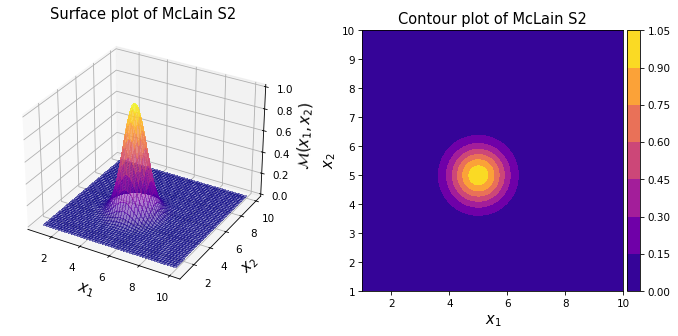

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

my_fun = uqtf.McLainS2()

# --- Create 2D data
xx_1d = np.linspace(1.0, 10.0, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1d, xx_1d)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create two-dimensional plots
fig = plt.figure(figsize=(10, 5))

# Surface
axs_1 = plt.subplot(121, projection='3d')
axs_1.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_1.set_xlabel("$x_1$", fontsize=14)
axs_1.set_ylabel("$x_2$", fontsize=14)
axs_1.set_zlabel("$\mathcal{M}(x_1, x_2)$", fontsize=14)
axs_1.set_title("Surface plot of McLain S2", fontsize=14)

# Contour
axs_2 = plt.subplot(122)
cf = axs_2.contourf(
    mesh_2d[0], mesh_2d[1], yy_2d.reshape(1000, 1000).T, cmap="plasma"
)
axs_2.set_xlabel("$x_1$", fontsize=14)
axs_2.set_ylabel("$x_2$", fontsize=14)
axs_2.set_title("Contour plot of McLain S2", fontsize=14)
divider = make_axes_locatable(axs_2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(cf, cax=cax, orientation='vertical')
axs_2.axis('scaled')

fig.tight_layout(pad=4.0)
plt.gcf().set_dpi(75);

As shown in the plots above, the resulting surface resembles a steep hill
rising from a plain. The location of the peak is at $(5.0, 5.0)$
and with the maximum height of $1.0$.

```{note}
The McLain S2 function appeared in a modified form in the report 
of Franke {cite}`Franke1979` (specifically the (5th) Franke function).

In fact, four of the Franke's test functions (2, 4, 5, and 6) are 
slight modifications of the McLain's, including the translation 
of the input domain from $[1.0, 10.0]^2$ to $[0.0, 1.0]^2$.
```

## Test function instance

To create a default instance of the McLain S2 function:

In [3]:
my_testfun = uqtf.McLainS2()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : McLainS2
Spatial dimension : 2
Description       : McLain S2 function from McLain (1974)


## Description

The McLain S2 function is defined as follows:

$$
\mathcal{M}(\boldsymbol{x}) = \exp{\left[ - \left( (x_1 - 5)^2 + (x_2 - 5)^2 \right) \right]}
$$
where $\boldsymbol{x} = \{ x_1, x_2 \}$
is the two-dimensional vector of input variables further defined below.

## Probabilistic input

Based on {cite}`McLain1974`, the probabilistic input model
for the function consists of two independent random variables as shown below.

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=2, marginals=(UnivDist(distribution='uniform', parameters=array([ 1., 10.]), name='X1', description='None'), UnivDist(distribution='uniform', parameters=array([ 1., 10.]), name='X2', description='None')), copulas=None, name='McLain-1974', description="Input specification for the McLain's test functions from McLain (1974).")

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

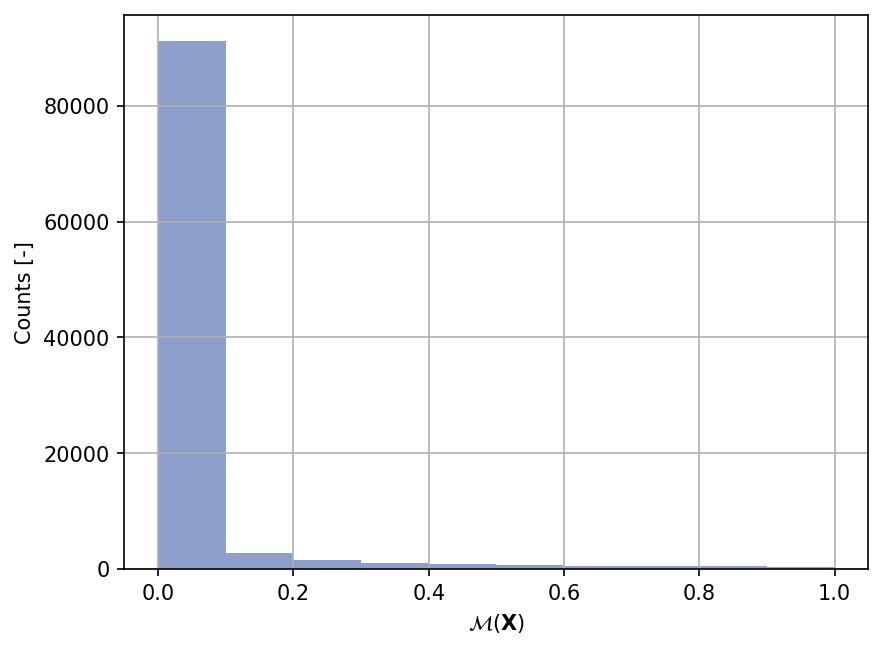

In [6]:
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```